In [ ]:
%run C:\Users\Omar\Desktop\Omar_Files\Python_Analysis\Siteck\NoteBooks\2.Data_Cleaning.ipynb

In [2]:
df.head()

,date,order_id,company,company_region,product_id,product,customer_id,product_category01,product_category02,product_category03,quantity,unit,price_per_case,total_sales,year,month,month_name,day,day_name
0,2021-01-01,6141309,121,South,11829,AVO32CNV2,DMKUT,32,CNV,2,224,case,41,9184,2021,1,January,1,Friday
1,2021-01-01,6377268,131,North,11541,AVO60CNV1,QPDXK,60,CNV,1,396,case,46,18216,2021,1,January,1,Friday
2,2021-01-01,6377268,131,North,11931,AVO48CNV1,QPDXK,48,CNV,1,148,case,45,6660,2021,1,January,1,Friday
3,2021-01-01,6191867,121,South,11829,AVO32CNV2,IEHDJ,32,CNV,2,150,case,41,6150,2021,1,January,1,Friday
4,2021-01-01,6191867,121,South,11385,AVO48CNV2,IEHDJ,48,CNV,2,294,case,49,14406,2021,1,January,1,Friday


In [294]:
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error,r2_score,mean_absolute_error,accuracy_score,root_mean_squared_error
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from xgboost import XGBRFRegressor
import graphviz
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV,cross_val_score,KFold
import warnings                                  
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder,StandardScaler
from tqdm import tqdm

*Date preprocessing*

In [4]:
categories_encoder=LabelEncoder()
for col in df:
    if col in list(df.select_dtypes(include="object").columns):
        df[col]=categories_encoder.fit_transform(df[col])

In [5]:
df.head()

,date,order_id,company,company_region,product_id,product,customer_id,product_category01,product_category02,product_category03,quantity,unit,price_per_case,total_sales,year,month,month_name,day,day_name
0,2021-01-01,231,121,1,5,1,35,0,0,2,224,0,41,9184,0,1,4,1,0
1,2021-01-01,1437,131,0,4,5,176,2,0,1,396,0,46,18216,0,1,4,1,0
2,2021-01-01,1437,131,0,6,3,176,1,0,1,148,0,45,6660,0,1,4,1,0
3,2021-01-01,470,121,1,5,1,85,0,0,2,150,0,41,6150,0,1,4,1,0
4,2021-01-01,470,121,1,2,4,85,1,0,2,294,0,49,14406,0,1,4,1,0


In [6]:
df.columns

Index(['date', 'order_id', 'company', 'company_region', 'product_id',
       'product', 'customer_id', 'product_category01', 'product_category02',
       'product_category03', 'quantity', 'unit', 'price_per_case',
       'total_sales', 'year', 'month', 'month_name', 'day', 'day_name'],
      dtype='object')

*Define x and y*

In [7]:
x=df.drop(["total_sales","date","year","month","month_name","day","day_name"],axis=1)
y=df["total_sales"]

*Splitting data into training and testing subsets*

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x,y ,test_size= 0.20)

print("Train data shape of X = % s and Y = % s : "%(
	x_train.shape, y_train.shape))

print("Test data shape of X = % s and Y = % s : "%(
	x_test.shape, y_test.shape))

Train data shape of X = (9070, 12) and Y = (9070,) : 
Test data shape of X = (2268, 12) and Y = (2268,) : 


*Data Scaling*

In [9]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [243]:

models = {
                "RandomForestRegressor": RandomForestRegressor(),
                "DecisionTreeRegressor": DecisionTreeRegressor(),
                "LinearRegression": LinearRegression(),
                "XGBRFRegressor": XGBRFRegressor(),
                "GradientBoostingRegressor":GradientBoostingRegressor(),
                "AdaBoostRegressor": AdaBoostRegressor()
                
            }

params={        
                "RandomForestRegressor":{
                    "n_estimators":[90,100,110], 
                    "min_samples_split":[2,4,6],
                    "min_samples_leaf":[0.8,1],
                    "bootstrap":[True, False],                                                                                                    
                    "max_features":["sqrt","log2","auto"],                                     
                    "max_depth":[2,3,4],
                    "criterion":['poisson', 'squared_error','friedman_mse','absolute_error']
                    },

                "DecisionTreeRegressor": {
                    'criterion':['poisson', 'squared_error','friedman_mse','absolute_error'],
                    'splitter': ['best', 'random'],
                    "max_depth":[2,3,4], 
                    "min_samples_split":[2,4,6],
                    "min_samples_leaf":[0.5,0.8],
                    #'max_features': [1,2,3,4],
                },
                "LinearRegression":{

                },
                "XGBRFRegressor":{
                    'learning_rate': [0.001,0.1,1],
                    'n_estimators': [90, 100, 110], 
                    "booster":["gbtree"],
                    'colsample_bytree': [0.5,0.8], 
                    'colsample_bynode': [0.5,0.8],
                    'random_state':[42]
                },

                
                "GradientBoostingRegressor":{
                    #'loss':['squared_error', 'huber', 'absolute_error', 'quantile'],
                    'learning_rate': [0.01,0.1,1],
                    'n_estimators': [90, 100, 110],
                    'subsample': [0.8,1],
                    #'criterion':['squared_error', 'friedman_mse'],
                    'min_samples_split': [2, 4, 6],
                    'min_samples_leaf': [0.8, 1],
                    'max_depth':[2,3,4],
                    #'max_features': ['sqrt', 'log2', 'auto']
                },
                "AdaBoostRegressor":{
                    'n_estimators': [45,50,55],
                    'learning_rate': [0.0001,0.001,0.01],
                    'loss':['linear','square','exponential'],
                    #'random_state':[42]
                    
                }
                
            }


In [244]:
def evaluate_models(x_train,y_train,x_test,y_test,models,params):            
                report = {}
                #report2={}
                for i in tqdm(range(len(list(models)))):
                    model=list(models.values())[i]
                    para=params[list(models.keys())[i]]

                    RandomSearchCV=RandomizedSearchCV(model,param_distributions= para,cv=3)
                    RandomSearchCV.fit(x_train,y_train)

                    model.set_params(**RandomSearchCV.best_params_)
                    model.fit(x_train,y_train)

                    y_train_prediction=model.predict(x_train)
                    y_test_prediction=model.predict(x_test)

                    model_train_mean_absolute_percentage_error=mean_absolute_percentage_error(y_train,y_train_prediction)
                    model_test_mean_absolute_percentage_error=mean_absolute_percentage_error(y_test,y_test_prediction)

                    model_train_r2_score=r2_score(y_train,y_train_prediction)
                    model_test_r2_score=r2_score(y_test,y_test_prediction)

                    #report[list(models.keys())[i]] = model_train_mean_absolute_percentage_error
                    report[list(models.keys())[i]] = (model_train_mean_absolute_percentage_error,model_test_mean_absolute_percentage_error,model_train_r2_score,model_test_r2_score,
                                                      RandomSearchCV.best_params_)


                return report    

In [245]:
model_report:dict=evaluate_models(x_train, y_train, x_test, y_test,models=models,params=params)

100%|██████████| 6/6 [01:01<00:00, 10.20s/it]


In [250]:
model_report

{'RandomForestRegressor': (0.7024989463820108,
  0.7137061847997034,
  0.9030847518434598,
  0.9051566082430746,
  {'n_estimators': 110,
   'min_samples_split': 6,
   'min_samples_leaf': 1,
   'max_features': 'sqrt',
   'max_depth': 4,
   'criterion': 'squared_error',
   'bootstrap': False}),
 'DecisionTreeRegressor': (1.7343098795668725,
  1.735327083812425,
  0.0,
  -0.0007306906095227994,
  {'splitter': 'random',
   'min_samples_split': 4,
   'min_samples_leaf': 0.8,
   'max_depth': 3,
   'criterion': 'poisson'}),
 'LinearRegression': (0.1691145450960328,
  0.1697411950680681,
  0.9862562100362723,
  0.9873952878535092,
  {}),
 'XGBRFRegressor': (0.16808084524017228,
  0.17347211806176602,
  0.9830967731508958,
  0.9802835664484059,
  {'random_state': 42,
   'n_estimators': 110,
   'learning_rate': 1,
   'colsample_bytree': 0.8,
   'colsample_bynode': 0.8,
   'booster': 'gbtree'}),
 'GradientBoostingRegressor': (0.01462310872080698,
  0.015256209579576924,
  0.999907207535261,
  0.9

In [264]:
model_report_df=pd.DataFrame(model_report).iloc[:-1] 

In [266]:
model_report_df

,RandomForestRegressor,DecisionTreeRegressor,LinearRegression,XGBRFRegressor,GradientBoostingRegressor,AdaBoostRegressor
0,0.702499,1.73431,0.169115,0.168081,0.014623,0.42127
1,0.713706,1.735327,0.169741,0.173472,0.015256,0.415243
2,0.903085,0.0,0.986256,0.983097,0.999907,0.967096
3,0.905157,-0.000731,0.987395,0.980284,0.998661,0.966439


In [267]:
model_report_df["metrices"]=["model_train_mean_absolute_percentage_error","model_test_mean_absolute_percentage_error","model_train_r2_score","model_test_r2_score"]

In [268]:
model_report_df

,RandomForestRegressor,DecisionTreeRegressor,LinearRegression,XGBRFRegressor,GradientBoostingRegressor,AdaBoostRegressor,metrices
0,0.702499,1.73431,0.169115,0.168081,0.014623,0.42127,model_train_mean_absolute_percentage_error
1,0.713706,1.735327,0.169741,0.173472,0.015256,0.415243,model_test_mean_absolute_percentage_error
2,0.903085,0.0,0.986256,0.983097,0.999907,0.967096,model_train_r2_score
3,0.905157,-0.000731,0.987395,0.980284,0.998661,0.966439,model_test_r2_score


In [286]:
GradientBoostingRegressor_best_paramerts=[k[4] for i,k in model_report.items() if i=="GradientBoostingRegressor"]
GradientBoostingRegressor_best_paramerts

[{'subsample': 0.8,
  'n_estimators': 110,
  'min_samples_split': 4,
  'min_samples_leaf': 1,
  'max_depth': 4,
  'learning_rate': 0.1}]

In [289]:
model=GradientBoostingRegressor(subsample= 0.8,
  n_estimators= 110,
  min_samples_split= 4,
  min_samples_leaf= 1,
  max_depth= 4,
  learning_rate= 0.1).fit(x_train,y_train)

In [290]:
predicted=model.predict(x_test)

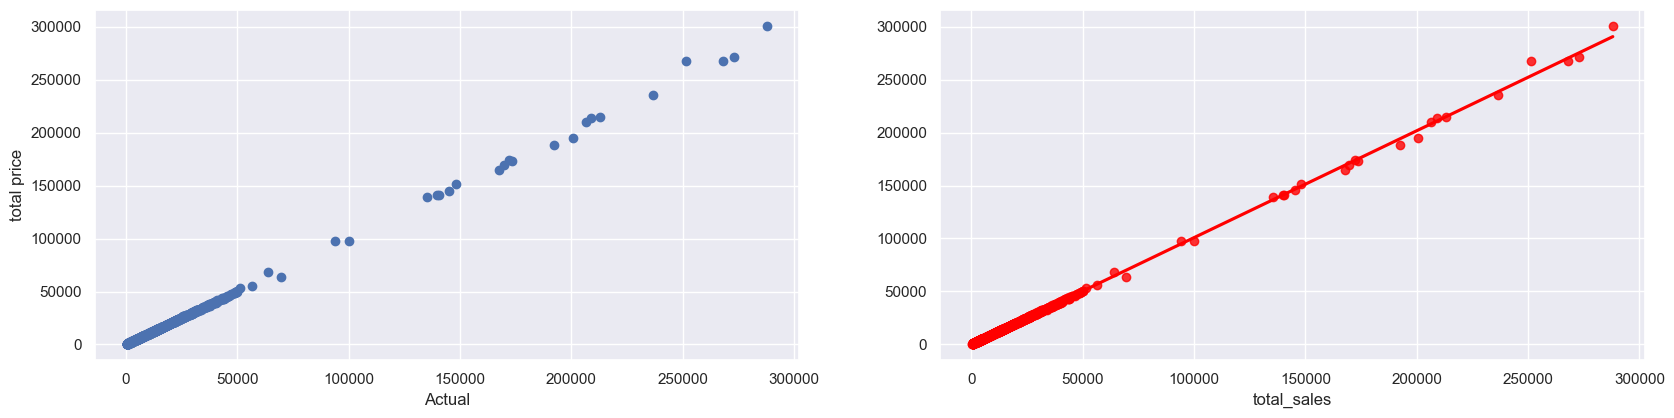

In [291]:
plt.subplot(221)
plt.scatter(y_test,predicted);

plt.xlabel('Actual');
plt.ylabel('total price');

plt.subplot(222)
sns.regplot(x=y_test,y=predicted,ci=None,color ='red');